# MNIST Classificator

* Ismael Pereira
* Willian Hayashida

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

test_size = int((0.1)* float(digits.target.shape[0]))

print(digits.data.shape, digits.target.shape)

(1797, 64) (1797,)


In [2]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

## Splitting Dataset

In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(digits.data, digits.target, test_size=0.10, random_state=42)

In [4]:
train_data.shape

(1617, 64)

In [5]:
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Exploring data

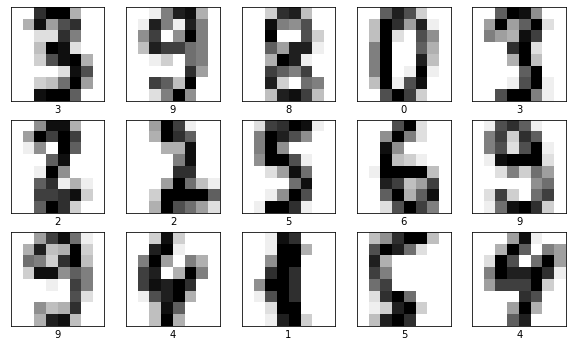

In [6]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i]])
    plt.imshow(train_data.reshape(1617, 8, 8)[i], cmap=plt.cm.gray_r, interpolation='nearest')

In [7]:
# Normalizing data
train_data = train_data / 16.0
test_data = test_data / 16.0

In [8]:
train_data[0]

array([0.    , 0.    , 0.8125, 1.    , 1.    , 0.3125, 0.    , 0.    ,
       0.    , 0.3125, 0.9375, 0.375 , 0.6875, 0.8125, 0.    , 0.    ,
       0.    , 0.    , 0.125 , 0.125 , 0.8125, 0.5   , 0.    , 0.    ,
       0.    , 0.    , 0.25  , 1.    , 0.9375, 0.125 , 0.    , 0.    ,
       0.    , 0.    , 0.1875, 0.6875, 0.9375, 1.    , 0.3125, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.125 , 0.9375, 0.6875, 0.    ,
       0.    , 0.    , 0.1875, 0.25  , 0.5625, 1.    , 0.375 , 0.    ,
       0.    , 0.    , 0.9375, 1.    , 1.    , 0.625 , 0.    , 0.    ])

## One-Hot Encoding the labels

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
train_labels_onehot = encoder.fit_transform(train_labels.reshape(-1, 1))
train_labels_onehot = train_labels_onehot.toarray()

encoder = OneHotEncoder()
test_labels_onehot = encoder.fit_transform(test_labels.reshape(-1, 1))
test_labels_onehot = test_labels_onehot.toarray()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case yo

In [10]:
train_labels_onehot[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [11]:
X_train = train_data
Y_train = train_labels

X_test = test_data
Y_test = test_labels

## Auxiliar Functions

In [12]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    

## Softmax and Cost

In [13]:
def softmax(x):
  """
  :param x: k, m
  """
  exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
  return exp_x / np.sum(exp_x, axis=0, keepdims=True)

def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2 + 1e-15), Y)
    cost = - np.sum(logprobs) / m
    cost = np.squeeze(cost)

    return cost

def delta_ReLU(x):
  return (x > 0) * 1


## Optimizer

In [14]:
def inicialize_momentum(W, b):
  vd = {}
  for i in range(1, len(W)+1):
    vd['dw' + str(i)] = np.zeros(W[i].shape)
    vd['db' + str(i)] = np.zeros(b[i].shape)
  
  return vd

def momentum(vd, grads, beta=0.9):
  # unpack
  dW = grads['dW']
  db = grads['db']
  
  for i in range(1, len(dW) + 1):
    vd['dw' + str(i)] = beta * vd['dw' + str(i)] + (1 - beta) * dW[i]
    vd['db' + str(i)] = beta * vd['db' + str(i)] + (1 - beta) * db[i]
  
  return vd

def RMSprop(sd, grads, beta=0.9):
  # unpack
  dW = grads['dW']
  db = grads['db']
  
  for i in range(1, len(dW) + 1):
    sd['dw' + str(i)] = beta * sd['dw' + str(i)] + (1 - beta) * (dW[i]**2)
    sd['db' + str(i)] = beta * sd['db' + str(i)] + (1 - beta) * (db[i]**2)
  return sd

def bias_correction(vd, t, beta):
  cvd ={}
  for i in range(1, len(vd)//2+1):
    cvd['dw' + str(i)] = vd['dw' + str(i)] / (1. - beta**t + 1e-15)
    cvd['db' + str(i)] = vd['db' + str(i)] / (1. - beta**t + 1e-15) 
    
  return cvd

## Logistic Regression

In [15]:
from sklearn.utils import shuffle


def LR_model(X, Y, W, b, n_epochs=50, beta=0.9, alpha=0.25, lambd=0.1):
  
  n = X.shape[0]
  m = X.shape[1]
  
  vdW = np.zeros(W.shape)
  vdb = np.zeros(b.shape)
  
  costs = []
  
  for epoch in range(n_epochs):     
    J = 0
    for i in range(100):
      
      xi = X[:, i*(m//100):(i+1)*(m//100)].reshape((n, m//100)) # n, 500
      yi = Y[i*(m//100):(i+1)*(m//100)].reshape((1, m//100)) # 1, 500
      # xi = X[:, i].reshape((n,1))
      # yi = Y[i].reshape((1,1))
      
      zi = np.dot(W, xi) + b # 1, 500
      ai = 1 / (1 + np.exp(-zi)) # 1, 500
      
      # J += -(yi * np.log(1e-15 + ai) + (1 - yi)*np.log(1e-15 + 1 - ai))
      
      # gradient
      dzi = ai - yi # 1, 500
      dW = (1.0 / m) * np.dot(dzi, xi.T) + (lambd / m) * W # 1, n
      db = (1.0 / m) * np.sum(dzi, axis=1, keepdims=True)

      # alpha = 1.0 / (100 + m * (epoch/10 + 1) + i)
      if epoch > n_epochs * 0.8:
        alpha = 0.01
      elif epoch > n_epochs * 0.6:
        alpha = 0.05
      elif epoch > n_epochs * 0.5:
        alpha = 0.1
      
      
      W = W - alpha * dW
      b = b - alpha * db
      
    #calculate the cost function
    aux = np.sum(np.square(W))
    reg_cost = aux * lambd / (2 * m)
    
    #calculate loss
    cost = compute_cost(ai, yi) + reg_cost
    costs.append(cost)
    
    if epoch % 20 == 0:      
      print("Epoch %i:\tloss: %f" % (epoch, cost))
#   print(W.shape, b.shape, cost.shape)
  return W, b



In [16]:
def predict_LR(X, W, b):
  zi = np.dot(W, X) + b
  
  ai = 1 / (1 + np.exp(-zi))
  
  predict = np.argmax(ai, axis=0)
  
  return predict 

### Training model

In [69]:
folds = 6
n_epochs = 120

alpha = 0.25
lambd = 0.1

W = np.random.rand(10, train_data.shape[1]) * 0.0001
# b = np.random.rand(10)
# W = np.zeros(shape=(10, train_data.shape[1]))
b = np.zeros(shape=(10, 1))

mean_W = np.zeros((10, train_data.shape[1]))
mean_b = b = np.zeros(shape=(10, 1))

# cost = np.zeros((10, n_epochs))
accuracy_LR = []
best_accuracy = 0.0

In [70]:
import time

m = digits.data.shape[0]

for index_split in range(folds):
  print("fold: %d " % index_split)

  u = index_split*200
  v = (index_split+1)*200
  
  X_train = np.append(train_data[0:u], train_data[v:], axis=0)
  X_validation = train_data[u:v]
  Y_validation = train_labels[u:v]
  
  # train model
  starter_time = time.time()
  for i in range(10):
    print("** class %i **" % i)
    Y_train = np.append(train_labels_onehot[0:u,i], train_labels_onehot[v:,i], axis=0)
    W[i], b[i] = LR_model(X_train.T, 
                          Y_train.T, 
                          W[i].reshape(1, 64), 
                          b[i].reshape(1), 
                          n_epochs=n_epochs, 
                          alpha=alpha, 
                          lambd=0.1
                         )
  time_LR = time.time() - starter_time
  
  # validate model
  Y_predicted = predict_LR(X_validation.T, W, b)  
  
  n_correct = sum(Y_validation == Y_predicted)
  accuracy_LR.append(float(n_correct) / len(Y_predicted))
  # update best model
  if accuracy_LR[index_split] > best_accuracy:
    best_accuracy = accuracy_LR[index_split]
    LR_W_best = W.copy()
    LR_b_best = b.copy()
  
  mean_W = mean_W + W
  mean_b = mean_b + b

mean_W = mean_W / folds
mean_b = mean_b / folds
print(time_LR)

fold: 0 
** class 0 **
Epoch 0:	loss: 0.235951
Epoch 20:	loss: 0.266691
Epoch 40:	loss: 0.177190
Epoch 60:	loss: 0.131530
Epoch 80:	loss: 0.121917
Epoch 100:	loss: 0.117437
** class 1 **
Epoch 0:	loss: 0.000002
Epoch 20:	loss: 0.000025
Epoch 40:	loss: 0.000051
Epoch 60:	loss: 0.000081
Epoch 80:	loss: 0.000091
Epoch 100:	loss: 0.000096
** class 2 **
Epoch 0:	loss: 0.081679
Epoch 20:	loss: 0.088585
Epoch 40:	loss: 0.051932
Epoch 60:	loss: 0.033999
Epoch 80:	loss: 0.030398
Epoch 100:	loss: 0.028751
** class 3 **
Epoch 0:	loss: 0.161706
Epoch 20:	loss: 0.206180
Epoch 40:	loss: 0.149243
Epoch 60:	loss: 0.116607
Epoch 80:	loss: 0.108933
Epoch 100:	loss: 0.105366
** class 4 **
Epoch 0:	loss: 0.167282
Epoch 20:	loss: 0.222412
Epoch 40:	loss: 0.158499
Epoch 60:	loss: 0.122409
Epoch 80:	loss: 0.114211
Epoch 100:	loss: 0.110361
** class 5 **
Epoch 0:	loss: 0.000002
Epoch 20:	loss: 0.000026
Epoch 40:	loss: 0.000051
Epoch 60:	loss: 0.000081
Epoch 80:	loss: 0.000091
Epoch 100:	loss: 0.000096
** clas

Epoch 80:	loss: 0.047618
Epoch 100:	loss: 0.047435
fold: 5 
** class 0 **
Epoch 0:	loss: 0.040936
Epoch 20:	loss: 0.040798
Epoch 40:	loss: 0.040268
Epoch 60:	loss: 0.039766
Epoch 80:	loss: 0.039638
Epoch 100:	loss: 0.039574
** class 1 **
Epoch 0:	loss: 0.000327
Epoch 20:	loss: 0.000334
Epoch 40:	loss: 0.000340
Epoch 60:	loss: 0.000346
Epoch 80:	loss: 0.000348
Epoch 100:	loss: 0.000349
** class 2 **
Epoch 0:	loss: 0.006336
Epoch 20:	loss: 0.006672
Epoch 40:	loss: 0.006574
Epoch 60:	loss: 0.006465
Epoch 80:	loss: 0.006439
Epoch 100:	loss: 0.006424
** class 3 **
Epoch 0:	loss: 0.037249
Epoch 20:	loss: 0.034557
Epoch 40:	loss: 0.033739
Epoch 60:	loss: 0.033072
Epoch 80:	loss: 0.032849
Epoch 100:	loss: 0.032741
** class 4 **
Epoch 0:	loss: 0.036210
Epoch 20:	loss: 0.034667
Epoch 40:	loss: 0.033887
Epoch 60:	loss: 0.033250
Epoch 80:	loss: 0.033047
Epoch 100:	loss: 0.032950
** class 5 **
Epoch 0:	loss: 0.000376
Epoch 20:	loss: 0.000384
Epoch 40:	loss: 0.000392
Epoch 60:	loss: 0.000399
Epoch 8

In [71]:
# LR_W_best
LR_W_mean = mean_W.copy()
LR_W_last = W.copy()

LR_b_mean = mean_b.copy()
LR_b_last = b.copy()

In [72]:
X_train = train_data

Y_train = train_labels  
# LR_W_best, LR_W_mean & LR_W_last
Y_predicted = predict_LR(X_validation.T, LR_W_best, LR_b_best.reshape(10,1)) # 60000,
n_correct = sum(Y_validation == Y_predicted)

cm =confusion_matrix(Y_validation, Y_predicted)


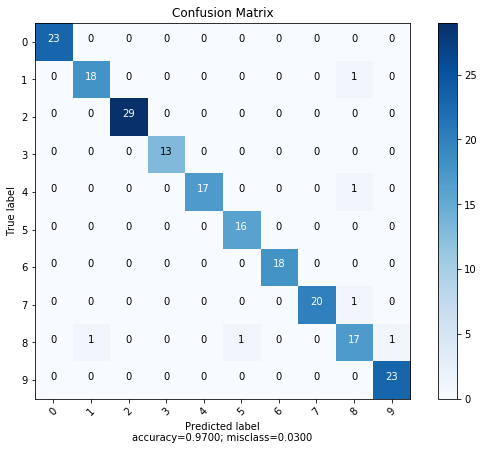

In [73]:
plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

## Softmax Regression

In [23]:
def predict_MLR(X, W, b):
  """
  :param X: data           (no features, no examples)
  :param W: weights        (no classes, no features)
  :param b: bias           (no classes, 1)
  :return:
  """
  # Y: k, m
  y_pred = np.argmax(softmax(np.dot(W, X) + b), axis=0)
  return y_pred


def propagate(X, Y, W, b, lambd):
  """
  :param X: data           (no featurs, no examples)
  :param Y: one hot labels (no classes, no examples)
  :param W: weights        (no classes, no features)
  :param b: bias           (no classes, 1)
  :return:
  """

  # X: n, m
  # Y: k, m
  m = X.shape[1]  # getting no of rows

  # Forward Prop
  A = softmax(np.dot(W, X) + b) # shape: k, m

  cost = (-1.0 / m) * np.sum(Y * np.log(1e-15 + A))
 
  # backwar prop
  dZ = A - Y # shape: k, m
  dw = (1.0 / m) * np.dot(dZ, X.T) + (lambd / m) * W # k, n
  db = (1.0 / m) * np.sum(dZ, axis=1, keepdims=True)
  cost = np.squeeze(cost)
  grads = {"dw": dw,
           "db": db}
  return grads, cost, np.argmax(A, axis=0)


def MR_model(X, Y, W, b, n_epochs, alpha, lambd=0.1, beta=0.9):
    """
    :param X: data           (no features, no examples)
    :param Y: one hot labels (no classes, no examples)
    :param W: weights        (no classes, no features)
    :param b: bias           (no classes, 1)
    :param n_epochs: number of iterations for gradient
    :param alpha:
    :return:
    """
    
    n = X.shape[0]  # getting no of rows
    m = X.shape[1]  # getting no of rows

    vdw = np.zeros(W.shape)
    vdb = np.zeros(b.shape)
    
    costs = []
    for epoch in range(n_epochs):
      for i in range(100):
        
        xi = X[:, i*(m//100):(i+1)*(m//100)].reshape((n, m//100)) # n, 500
        yi = Y[:, i*(m//100):(i+1)*(m//100)].reshape((10, m//100)) # 1, 500
      
      
        grads, cost, A = propagate(xi, yi, W, b, lambd)
        dw = grads["dw"]
        db = grads["db"]
        
        vdw = beta * vdw + (1 - beta) * dw
        vdb = beta * vdb + (1 - beta) * db
        
        W = W - alpha * vdw
        b = b - alpha * vdb
        
        alpha = alpha * 0.99

        cost += np.sum(np.square(W)) * lambd / (2 * m)
        costs.append(cost)

      if epoch % 50 == 0:
        n_correct = np.sum(np.argmax(yi, axis=0) == A)
        accuracy = float(n_correct) / len(A)  
        
        
        print("Epoch %i:\tloss: %f\tacc: %f" % (epoch, cost, accuracy))

    return W, b, costs

In [75]:
n_epochs = 200
folds = 6

# W = np.random.randn(10, train_data.shape[1]) * 0.00001
# b = np.random.randn(1 ,10)
W = np.zeros(shape=(10, train_data.shape[1]))
b = np.zeros(shape=(10, 1))

MLR_W_mean = np.zeros((10, train_data.shape[1]))
MLR_b_mean = np.zeros(shape=(10, 1))

MLR_costs = []

MLR_accuracy = []
best_accuracy = 0.0


In [76]:
import time

for index_split in range(folds):
  print("fold: %d " % index_split)
  u = index_split * 200
  v = (index_split + 1) * 200
  # Separate set
  X_train = np.append(train_data[0:u], train_data[v:], axis=0)  # shape: m, n
  Y_train = np.append(train_labels_onehot[0:u], train_labels_onehot[v:], axis=0)  # shape: m, k
  X_validation = train_data[u:v]
  Y_validation = train_labels[u:v]
  
  # train model
  starter_time = time.time()
  W, b, cost = MR_model(X_train.T, Y_train.T, W, b, n_epochs, alpha=0.25, lambd=0.1, beta=0.88)
  time_MLR = time.time() - starter_time
  
  # validate model
  Y_predicted = predict_MLR(X_validation.T, W, b)
  n_correct = sum(Y_validation == Y_predicted)
  
  MLR_costs.append(cost)
  MLR_accuracy.append(float(n_correct) / len(Y_predicted))
  
  if MLR_accuracy[index_split] > best_accuracy:
    best_accuracy = MLR_accuracy[index_split]
    MLR_W_best = W.copy()
    MLR_b_best = b.copy()

  MLR_W_mean = MLR_W_mean + W
  MLR_b_mean = MLR_b_mean + b
  
MLR_W_mean = MLR_W_mean / folds
MLR_b_mean = MLR_b_mean / folds
  
    
print(time_MLR)

fold: 0 
Epoch 0:	loss: 0.774401	acc: 1.000000
Epoch 50:	loss: 0.551627	acc: 1.000000
Epoch 100:	loss: 0.551627	acc: 1.000000
Epoch 150:	loss: 0.551627	acc: 1.000000
fold: 1 
Epoch 0:	loss: 0.397105	acc: 1.000000
Epoch 50:	loss: 0.349901	acc: 1.000000
Epoch 100:	loss: 0.349901	acc: 1.000000
Epoch 150:	loss: 0.349901	acc: 1.000000
fold: 2 
Epoch 0:	loss: 0.310396	acc: 1.000000
Epoch 50:	loss: 0.297769	acc: 1.000000
Epoch 100:	loss: 0.297769	acc: 1.000000
Epoch 150:	loss: 0.297769	acc: 1.000000
fold: 3 
Epoch 0:	loss: 0.276409	acc: 1.000000
Epoch 50:	loss: 0.268366	acc: 1.000000
Epoch 100:	loss: 0.268366	acc: 1.000000
Epoch 150:	loss: 0.268366	acc: 1.000000
fold: 4 
Epoch 0:	loss: 0.259268	acc: 1.000000
Epoch 50:	loss: 0.261177	acc: 1.000000
Epoch 100:	loss: 0.261177	acc: 1.000000
Epoch 150:	loss: 0.261177	acc: 1.000000
fold: 5 
Epoch 0:	loss: 0.247106	acc: 1.000000
Epoch 50:	loss: 0.252373	acc: 1.000000
Epoch 100:	loss: 0.252373	acc: 1.000000
Epoch 150:	loss: 0.252373	acc: 1.000000
1.38

[0.9, 0.92, 0.94, 0.94, 0.95, 0.975]


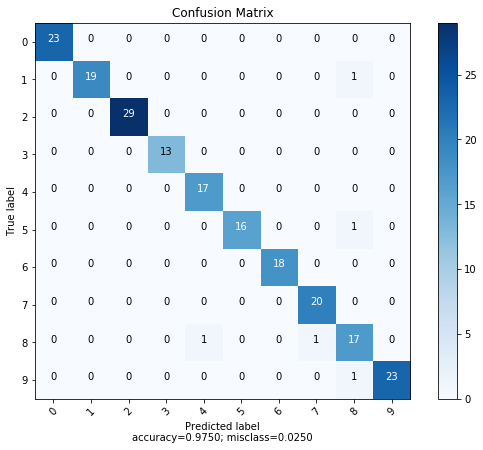

In [77]:
print(MLR_accuracy)
# print(time_MLR)
Y_predicted = predict_MLR(X_validation.T, MLR_W_best, MLR_b_best)

cm =confusion_matrix(Y_predicted, Y_validation)

plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")


In [34]:
def multinomialSGD(X, Y, W, b, n_epochs=50, lambd=0.08, beta=0.87):
  """
  :param X: data           (no features, no examples)
  :param Y: one hot labels (no classes, no examples)
  :param W: weights        (no classes, no features)
  :param b: bias           (no classes, 1)
  :param n_epochs: number of iterations for gradient
  :param alpha:
  :return:
  """
  n = X.shape[0]
  m = X.shape[1]
  k = 10
  
  # X: n, m
  # Y: k ,m
  
  cost = np.zeros(n_epochs)    
  for epoch in range(n_epochs):     
    J = 0.0
    for i in range(m):
      xi = X[:, i].reshape((n,1)) # n, 1
      yi = Y[:, i].reshape((k, 1)) # shape: k, 1
      
      # forward prop
      zi = np.dot(W, xi) + b # shape = k, 1
      pk = softmax(zi) # shape = k, 1
      # loss
      J += np.sum(-yi * np.log(1e-15 + pk))
      # derivatives 
      dzi = pk - yi # shape: k, 1  
      dW = np.dot(dzi, xi.T) + (lambd / m) * W # shape: k, n
      
      alpha = 1.0 / (100.0 + m * (epoch/10 + 1) + i)
      
      W = W - alpha * dW
      b = b - alpha * dzi
    
    cost[epoch] = (J / m) + np.sum(np.square(W)) * lambd / (2 * m)
    if epoch % 10  == 0:
      print("Cost after epoch %i: %f" % (epoch, cost[epoch]))
  return W, b, cost 

In [78]:
n_epochs = 80

folds = 6
W = 0.0025 * np.random.randn(10, train_data.shape[1])
b = np.zeros(shape=(10, 1))

SGD_MLR_W_mean = np.zeros((10, train_data.shape[1]))
SGD_MLR_b_mean = np.zeros(shape=(10, 1))

SGD_MLR_costs = []

SGD_MLR_accuracy = []
best_accuracy = 0.0 

In [79]:
import time

for index_split in range(folds):
  print("fold: %d " % index_split)
  u = index_split * 200
  v = (index_split + 1) * 200

  X_train = np.append(train_data[0:u], train_data[v:], axis=0)  # shape: m, n
  Y_train = np.append(train_labels_onehot[0:u], train_labels_onehot[v:], axis=0)  # shape: m, k
  Y_labels = np.append(train_labels[0:u], train_labels[v:], axis=0)  # shape: m, k
  X_validation = train_data[u:v]
  Y_validation = train_labels[u:v]
  # train model
  starter_time = time.time()
  W, b, costs = multinomialSGD(X_train.T, Y_train.T, W, b, n_epochs)
  time_SGD = time.time() - starter_time
  # validate
  Y_predicted = predict_MLR(X_validation.T, W, b)
  
  n_correct = sum(Y_validation == Y_predicted)
  SGD_MLR_costs.append(cost)
  SGD_MLR_accuracy.append(float(n_correct) / len(Y_predicted))
  # update best model
  if SGD_MLR_accuracy[index_split] > best_accuracy:
    best_accuracy = SGD_MLR_accuracy[index_split]
    SGD_MLR_W_best = W.copy()
    SGD_MLR_b_best = b.copy()

  SGD_MLR_W_mean = SGD_MLR_W_mean + W
  SGD_MLR_b_mean = SGD_MLR_b_mean + b

SGD_MLR_W_mean = SGD_MLR_W_mean / folds
SGD_MLR_b_mean = SGD_MLR_b_mean / folds

    
print(time_SGD)

fold: 0 
Cost after epoch 0: 2.236113
Cost after epoch 10: 1.505602
Cost after epoch 20: 1.213677
Cost after epoch 30: 1.058095
Cost after epoch 40: 0.960662
Cost after epoch 50: 0.893267
Cost after epoch 60: 0.843452
Cost after epoch 70: 0.804859
fold: 1 
Cost after epoch 0: 0.769109
Cost after epoch 10: 0.659053
Cost after epoch 20: 0.605725
Cost after epoch 30: 0.572608
Cost after epoch 40: 0.549402
Cost after epoch 50: 0.531922
Cost after epoch 60: 0.518105
Cost after epoch 70: 0.506803
fold: 2 
Cost after epoch 0: 0.497763
Cost after epoch 10: 0.459994
Cost after epoch 20: 0.439362
Cost after epoch 30: 0.425596
Cost after epoch 40: 0.415467
Cost after epoch 50: 0.407555
Cost after epoch 60: 0.401121
Cost after epoch 70: 0.395735
fold: 3 
Cost after epoch 0: 0.386140
Cost after epoch 10: 0.366695
Cost after epoch 20: 0.355545
Cost after epoch 30: 0.347861
Cost after epoch 40: 0.342075
Cost after epoch 50: 0.337477
Cost after epoch 60: 0.333685
Cost after epoch 70: 0.330474
fold: 4 

[0.895, 0.92, 0.935, 0.945, 0.95, 0.975]


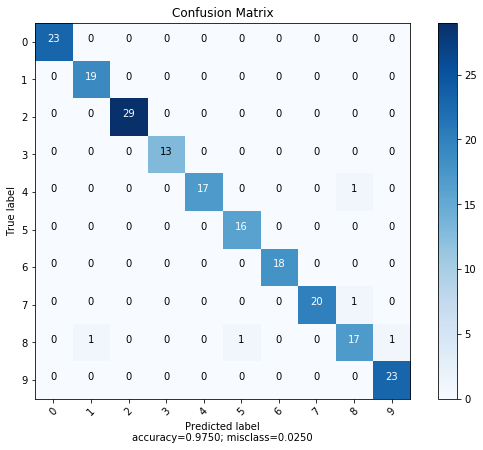

In [80]:
print(SGD_MLR_accuracy)

Y_predicted = predict_MLR(X_validation.T, SGD_MLR_W_best, SGD_MLR_b_best)
cm = confusion_matrix(Y_validation, Y_predicted)

plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

# Neural Network - 1 hidden layer

In [50]:
# hidden layer: tanh
# output layer: softmax

def forwardprop(X, W, b):
  # Forward prop
  Z = {}
  A = {}
  # ReLU
  # n1, n * n, m
  Z[1] = np.dot(W[1], X) + b[1] # n1, m
  A[1] = Z[1] * (Z[1] > 0)
#   A[0] = np.tanh(Z[0])
  Z[2] = np.dot(W[2], A[1]) + b[2] # n2, m
  A[2] = softmax(Z[2])
  
  return A, Z
  
def backprop(X, Y, W, b, A, Z, lambd=0.1):
  m = X.shape[1]
  dZ = {}
  dW = {}
  db = {}
  
  dZ[2] = A[2] - Y # n2, m  
  dW[2] = (1.0/m) * np.dot(dZ[2], A[1].T) + (lambd / m) * W[2]  # n2, n1
  db[2] = (1.0/m) * np.sum(dZ[2], axis=1, keepdims=True)
  
  #   dZ[0] = np.multiply(np.dot(W[1].T, dZ[1]),1 - np.square(A[0])) # n1, m
  dZ[1] = np.multiply(np.dot(W[2].T, dZ[2]),delta_ReLU(Z[1])) # n1, m
  dW[1] = (1.0/m) * np.dot(dZ[1], X.T) + (lambd / m) * W[1]  # n1, n
  db[1] = (1.0/m) * np.sum(dZ[1], axis=1, keepdims=True)
  
  grads = {
      'dW' : dW,
      'db' : db
  }
  
  return grads
  
def nn_one_layer(X, Y, W, b, n_epochs=50, alpha=0.01, lambd=0.1, beta=0.9):
  m = X.shape[1]  # getting no of rows
  l = len(W)
  costs = []
  
  vd = inicialize_momentum(W, b)
  
  for epoch in range(n_epochs):
    A, Z = forwardprop(X, W, b)
  
    grads = backprop(X, Y, W, b, A, Z)
    
    if epoch > n_epochs * 0.8:
      alpha = alpha * 0.5
    elif epoch > n_epochs * 0.6:
      alpha = alpha * 0.5
    elif epoch > n_epochs * 0.4:
      alpha = alpha * 0.9
    
    vd = momentum(vd, grads, beta)

    W[1] = W[1] - alpha * vd['dw1']
    b[1] = b[1] - alpha * vd['db1']
    W[2] = W[2] - alpha * vd['dw2']
    b[2] = b[2] - alpha * vd['db2']
    
    if epoch % 10 == 0:
      aux = 0.0
      for i in range(1, l + 1):
        aux = aux + np.sum(np.square(W[i]))
      reg_cost = aux * lambd / (2 * m)
      
      cost = compute_cost(A[2], Y)
      costs.append(cost)
      
      Y_predictions = np.argmax(A[2], axis=0)
      n_correct = np.sum(np.argmax(Y, axis=0) == Y_predictions)
      accuracy = float(n_correct) / len(Y_predictions)    
      
      print("Epoch %i:\tloss: %f\tacc: %f" % (epoch, cost, accuracy))
  return W, b, costs
            
            

In [51]:
def predict_nn(X, W, b):
    A, Z = forwardprop(X, W, b)
    predictions = np.argmax(A[2], axis=0)
    return predictions

In [55]:
train_data.shape[1]

64

In [81]:
n_epochs = 150

folds = 6
# no of neurons on hidden layer
n1 = 400


W = []
b = []
np.random.seed(5)

W = {
    1: np.random.randn(n1, train_data.shape[1]) * np.sqrt(2/784),
    2: np.random.randn(10, n1) * np.sqrt(1/n1)
}
b = {
    1: np.zeros((n1, 1)),
    2: np.zeros((10, 1))
}

nn_costs = np.zeros((10, n_epochs))

nn_accuracy = []
best_accuracy = 0.0

In [82]:
import time

for index_split in range(folds):
  print("fold: %d " % index_split)
  u = index_split * 200
  v = (index_split + 1) * 200

  X_train = np.append(train_data[0:u], train_data[v:], axis=0)  # shape: m, n
  Y_train = np.append(train_labels_onehot[0:u], train_labels_onehot[v:], axis=0)  # shape: m, k
  Y_labels = np.append(train_labels[0:u], train_labels[v:], axis=0)  # shape: m, k
  X_validation = train_data[u:v]
  Y_validation = train_labels[u:v]
  
  starter_time = time.time()
  W, b, costs = nn_one_layer(X_train.T, Y_train.T, W, b, n_epochs, alpha=0.25)
  time_nn = time.time() - starter_time

  Y_predicted = predict_nn(X_validation.T, W, b)

  n_correct = sum(Y_validation == Y_predicted)
  accuracy = float(n_correct) / len(Y_predicted)
  print("Accuracy: %f" % accuracy)

  # if accuracy_softmaxRegression[index_split] > best_accuracy:
  #     best_accuracy = accuracy_softmaxRegression[index_split]
  #     best_W_softmaxRegression = w
  #
  # mean_W_softmaxRegression = mean_W_softmaxRegression + W

print(time_nn)

fold: 0 
Epoch 0:	loss: 2.302272	acc: 0.074806
Epoch 10:	loss: 2.092839	acc: 0.654199
Epoch 20:	loss: 1.723447	acc: 0.857445
Epoch 30:	loss: 1.292546	acc: 0.867325
Epoch 40:	loss: 0.904579	acc: 0.906845
Epoch 50:	loss: 0.643460	acc: 0.914608
Epoch 60:	loss: 0.490118	acc: 0.922371
Epoch 70:	loss: 0.426574	acc: 0.925900
Epoch 80:	loss: 0.409923	acc: 0.927311
Epoch 90:	loss: 0.404824	acc: 0.928017
Epoch 100:	loss: 0.404303	acc: 0.928017
Epoch 110:	loss: 0.404303	acc: 0.928017
Epoch 120:	loss: 0.404303	acc: 0.928017
Epoch 130:	loss: 0.404303	acc: 0.928017
Epoch 140:	loss: 0.404303	acc: 0.928017
Accuracy: 0.910000
fold: 1 
Epoch 0:	loss: 0.405547	acc: 0.925194
Epoch 10:	loss: 0.381666	acc: 0.932251
Epoch 20:	loss: 0.342363	acc: 0.935074
Epoch 30:	loss: 0.305598	acc: 0.942131
Epoch 40:	loss: 0.275310	acc: 0.948483
Epoch 50:	loss: 0.251055	acc: 0.952011
Epoch 60:	loss: 0.231523	acc: 0.955540
Epoch 70:	loss: 0.220836	acc: 0.956246
Epoch 80:	loss: 0.217513	acc: 0.956951
Epoch 90:	loss: 0.216415

0.98


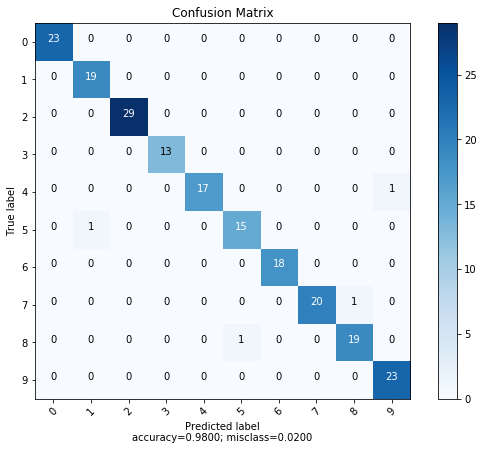

In [83]:
Y_predicted = predict_nn(X_validation.T, W,b)
n_correct = sum(Y_validation == Y_predicted)
accuracy = float(n_correct) / len(Y_predicted)
print(accuracy)

cm = confusion_matrix(Y_validation, Y_predicted)
plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

# Testing Models

---------------------------------------------------------------

** Logistic Regression


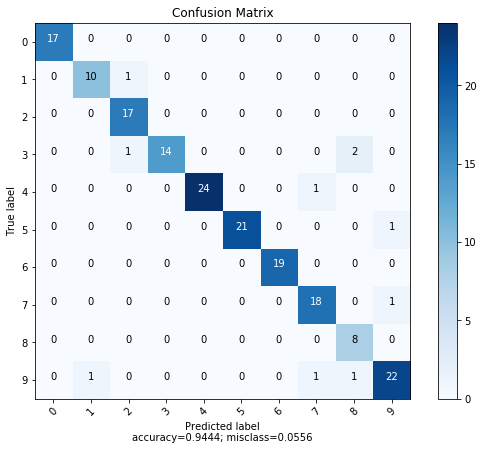

---------------------------------------------------------------

** Softmax Regression


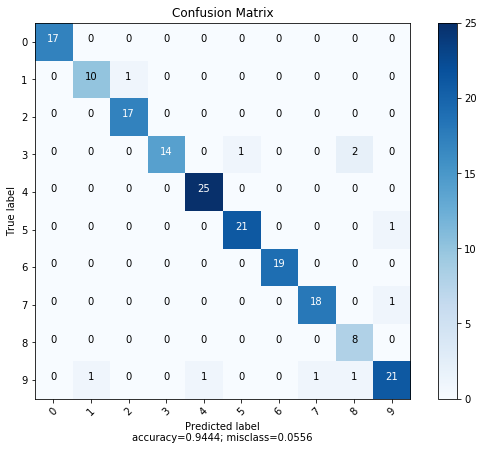

---------------------------------------------------------------

** Softmax Regression with SGD


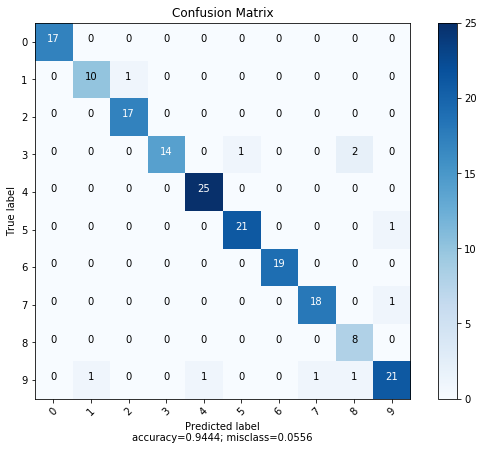

In [84]:
print("---------------------------------------------------------------\n")
print("** Logistic Regression")

Y_predicted = predict_LR(X_test.T, LR_W_best, LR_b_best.reshape(10,1))
n_correct = sum(Y_test == Y_predicted)

cm =confusion_matrix(Y_test, Y_predicted)

plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

print("---------------------------------------------------------------\n")
print("** Softmax Regression")


Y_predicted = predict_MLR(X_test.T, MLR_W_best, MLR_b_best)
cm = confusion_matrix(Y_test, Y_predicted)

plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

print("---------------------------------------------------------------\n")
print("** Softmax Regression with SGD")


Y_predicted = predict_MLR(X_test.T, SGD_MLR_W_best, SGD_MLR_b_best)
cm = confusion_matrix(Y_test, Y_predicted)

plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

---------------------------------------------------------------

** Neural Network - 1 layer


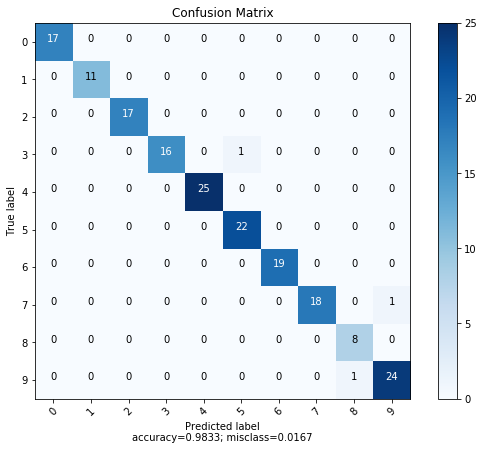

In [85]:
print("---------------------------------------------------------------\n")
print("** Neural Network - 1 layer")


Y_predicted = predict_nn(X_test.T, W,b)
cm = confusion_matrix(Y_test, Y_predicted)

plot_confusion_matrix(cm           =  cm,
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")

# Discussion and Conclusion

We achieved a good accuracy average of 0,953 in the test set. The Regression models scored the same accuracy, while the neural network scored a nice 0,9833. 

The implementation of the models itself was not a big problem.
We spent most of our time, adjusting parameters (alpha, lambd, beta and initial values for W) and trying to optimize the code. We ended up with a brute force approach or learn by doing approach to test values and see what happens.
After a lot of variations of parameters, we realized we were not documenting the results anywhere, after an iteration, we simply modified the values again and trained again. We could automate our tests with a script to train the model with many combinations and have the results saved to compare the results, unfortunatelly we did not manage to implement this script for this project.

There is a lot of potential to improve our code, espeacially the programming interface. Would be nice after having a easy interface, to compare our solution with other implementations on scikitlearning our other libraries.


# Collaboration

We implemented the pre-processing code (load data, split, normalize, one-hot encode) and the logistic regression together.

Ismael then implemented the both variations of Softmax regression.

Willian implemented the neural network with softmax.

Most part of the code was made together with [Deepnote](https://deepnote.com/).